In [2]:
import random
import csv
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import scipy
from scipy import stats
import statsmodels.api as sm

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

A company has produced 20 prototypes vehicles. They have put sensors all over the car to perform the tests. They are measuring the max weight on all wheels for braking to a stop at different speeds. When the car has reached its desired speed, the driver slams on the brakes. Various replications are for each speed on each vehicle, see the spreadsheets.

The data is grouped in 20 excel spreadsheets, one for each car. I have produced a text file so you can read that file in and then read all of the data of each sheet.

1. Create a data structure based upon each speed as the first parameter. Create fields for
all of the data and store everything that is contained in the excel sheets.

2. For any car and any speed between 40 and 50, 
- Identify the maximum force on the driver front tire
- Find a 99.9% confidence interval for the theoretical mean of the max force on the drivers front tire when braking for speeds between 40 and 50 miles an hour.

3. Run a simple linear regression model where speed is the x and force on the front drivers side tire is the output. Only do this for speeds of 25 or more miles per hour. 
- Provide the best model for this tire, and draw the scatter plot with line and the residual plot.
- Also give a prediction for the force if you were moving at 45 MPH.

4. Run a multiparameter linear regression for the force on the right front wheel. Include speed, temperature, wind, road angle, all angles of car, distance, and acceleration/deceleration. Report the best model.


In [3]:
class Car():
    def __init__(self, carnumber, speed, driverfront, passengerfront, driverrear, 
                 passengerrear, wind, temperature, roadangle, carangle1, 
                 carangle2, decceleration, distance, driver):
        self.carnumber = carnumber
        self.speed = speed 
        self.driverfront = driverfront
        self.passengerfront = passengerfront
        self.driverrear = driverrear
        self.passengerrear = passengerrear
        self.wind = wind
        self.temperature =temperature
        self.roadangle = roadangle
        self.carangle1 = carangle1
        self.carangle2 = carangle2
        self.decceleration = decceleration
        self.distance = distance
        self.driver = driver
        

In [4]:
def findcompnum(cars,teamname):
    for i in range (0,len(cars)):
        if teams[i].name==teamname:
            return(i)
    return(-1)

In [5]:
def readcardata(path,cars):
    with open(path, mode ='r') as file:
        csvFile = csv.reader(file)
        carnumber = 0
        for carfile in csvFile:
            carfilename = carfile[0]
            carnumber+=1
            # print(carnumber)
            # print(carfilename)
            wb = openpyxl.load_workbook(filename = carfilename, data_only=True)
            sheetnames = wb.sheetnames
            
            for s in range (0,len((sheetnames))):
                if sheetnames[s][5:]!='':  
                    speed = int(sheetnames[s][5:])
                    # print('Speed = ',speed) #to get only the speed
                    wsheet =wb[sheetnames[s]]
                    for i in range (2, wsheet.max_row+1):
                        driverfront = float(wsheet[i][0].value)
                        passengerfront = float(wsheet[i][1].value)
                        driverrear = float(wsheet[i][2].value)
                        passengerrear = float(wsheet[i][3].value)
                        wind = float(wsheet[i][4].value)
                        temperature = float(wsheet[i][5].value)
                        roadangle = float(wsheet[i][6].value)
                        carangle1 = float(wsheet[i][7].value)
                        carangle2 = float(wsheet[i][8].value)
                        decceleration = float(wsheet[i][9].value)
                        distance = float(wsheet[i][10].value)
                        driver = wsheet[i][11].value
                        cars.append(Car(carnumber, speed, driverfront, passengerfront, driverrear, 
                                         passengerrear, wind, temperature, roadangle, carangle1, 
                                         carangle2, decceleration, distance, driver))
 

In [6]:
cars =[]
path = 'filenames.txt'
readcardata(path,cars)

### Part 2
For any car and any speed between 40 and 50, 
- Identify the maximum force on the driver front tire
- Find a 99.9% confidence interval for the theoretical mean of the max force on the drivers front tire when braking for speeds between 40 and 50 miles an hour.

In [7]:
force40to50 = []
for i in range(0,len(cars)):
    if cars[i].speed >= 40 and cars[i].speed <= 50:
        # print(cars[i].speed)
        force40to50.append(cars[i].driverfront)

print('Maximum force on the driver front tire: ',np.max(force40to50))

Maximum force on the driver front tire:  1523.08


In [8]:
def confidenceinterval(datax):
    confidenceinterval =.999
    print ('Calcuating the ', 100* confidenceinterval , ' percent confidence interval for the mean on data set x')
    confint=stats.t.interval(confidenceinterval, len(datax)-1, loc=np.mean(datax),scale=stats.sem(datax)) 
    print('I am ',100*(confidenceinterval) , ' percent confidence that the theoretical mean has a value within the range ', confint)
    print ('The sample mean is ', np.mean(datax))

In [9]:
confidenceinterval(force40to50)

Calcuating the  99.9  percent confidence interval for the mean on data set x
I am  99.9  percent confidence that the theoretical mean has a value within the range  (1358.191630280357, 1368.4865191370523)
The sample mean is  1363.3390747087046


### Part 3
Run a simple linear regression model where speed is the x and force on the front drivers side tire is the output. Only do this for speeds of 25 or more miles per hour. 
- Provide the best model for this tire, and draw the scatter plot with line and the residual plot.
- Also give a prediction for the force if you were moving at 45 MPH.

In [10]:
speedover25 = []
forceover25 = []
for i in range(0,len(cars)):
    if cars[i].speed >= 25:
        speedover25.append(cars[i].speed)
        forceover25.append(cars[i].driverfront)

In [11]:
def speed_force(speed,force):
    datax = speed
    outputy = force
    addconstant=True
    #addconstant=False 
    
    if addconstant==True:  
        datax= sm.add_constant(datax,True)
    
    model   = sm.OLS(outputy,datax)
    results = model.fit()
    
    # plot
    plt.plot(speed,force,'o')
    plt.plot(speed,results.predict(),'-')
    plt.xlabel('Speed')
    plt.ylabel('Front driver force')
    plt.show() 

    # Residual
    plt.plot(speed,results.resid,'o')
    plt.xlabel('Speed')
    plt.ylabel('Residual')
    plt.show()
    
    return results

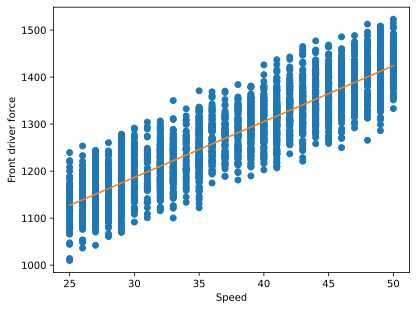

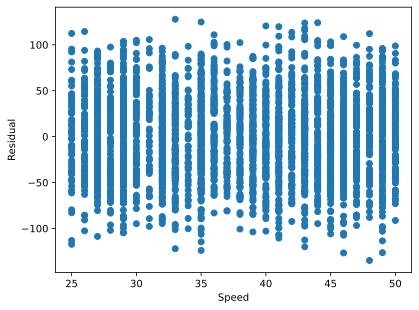

In [12]:
result = speed_force(speedover25, forceover25)

In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                 1.212e+04
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:14:43   Log-Likelihood:                -17083.
No. Observations:                3268   AIC:                         3.417e+04
Df Residuals:                    3266   BIC:                         3.418e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        829.9161      4.171    198.978      0.000     821.738     838.094
x1            11.8881      0.108    110.078      0.000      11.676      12.100
==============================================================================
Omnibus:                       44.210   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.972
Skew:                           0.035   Prob(JB):                     1.39e-06
Kurtosis:                       2.560   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comment on the regression method:
- R2 looks good
- p-value for f-st looks good
- p-values for the parameters also look good
- The model fits well

In [14]:
def predictforce(speed, result):
    force = result.params[0] + speed*result.params[1]
    print('Predict force = ', force)
predictforce(45, result)

Predict force =  1364.8805147043652


### Part 4
Run a multiparameter linear regression for the force on the right front wheel. Include speed, temperature, wind, road angle, all angles of car, distance, and acceleration/deceleration. Report the best model.

['speed', 'wind', 'temperature', 'roadangle', 'carangle1', 'carangle2', 'decceleration', 'distance']
indices in data  9  number of x indices  8
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 9.303e+04
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:19:00   Log-Likelihood:                -31148.
No. Observations:                7085   AIC:                         6.231e+04
Df Residuals:                    7076   BIC:                         6.238e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

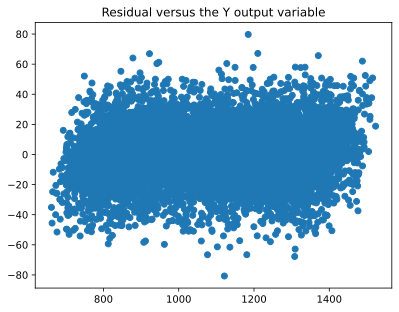

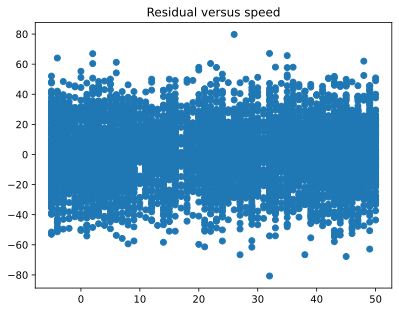

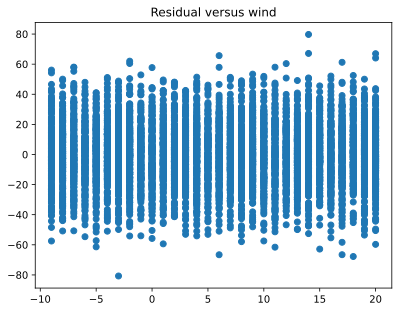

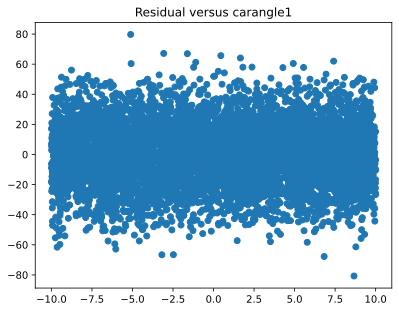

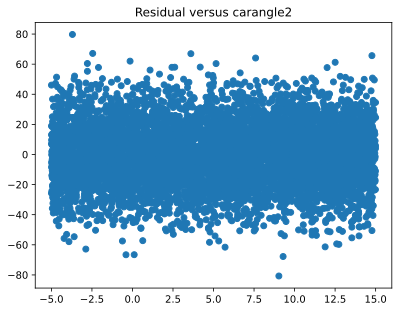

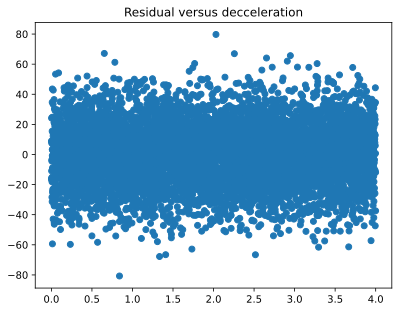

In [17]:
startingvariablenames=['speed', 'wind', 'temperature', 'roadangle', 'carangle1', 'carangle2', 'decceleration', 'distance']

datax=[]
outputy=[]
for i in range (0,len(cars)): 
    data = [cars[i].speed, cars[i].wind, cars[i].temperature, cars[i].roadangle, 
            cars[i].carangle1, cars[i].carangle2, cars[i].decceleration, cars[i].distance]
    datax.append(data) 
    outputy.append(cars[i].driverfront)

"""
Code Created on Tue Mar  1 10:24:25 2022

@author: Todd
"""

alpha=.05
constant=True
maxp=1

while maxp>alpha:
    #copydata
    print (startingvariablenames)
    copy=[]
    for i in range(0,len(datax)):
        temp=[]
        for j in range(0,len(datax[i])):
            temp.append(datax[i][j])
        copy.append(temp)
    if constant==True:
        datax= sm.add_constant(datax,True)
    print('indices in data ', len(datax[0]), ' number of x indices ', len(startingvariablenames), )
    mod = sm.OLS(outputy,datax)
    model=mod.fit()
    print(model.summary())
    maxp=max(model.pvalues)
    #This gets the position in the list of the max.
    worstindex=np.argmax(model.pvalues)
    print('The p values are ', model.pvalues)
    print ('The maximum p value is ', round(maxp,3) , ' occurring at x', worstindex)
    if maxp>alpha and len(model.pvalues)>=2:
        if constant==True:
            if worstindex==0:
                constant=False
                print('This is the constant and it will be removed')
                datax=[]
                for i in range (0,len(copy)):
                    temp=[]
                    for j in range(0,len(copy[i])):
                        temp.append(copy[i][j])
                    datax.append(temp)    
            else:
                worstindex=worstindex-1
                print('Removing x_', startingvariablenames[worstindex],' from the Model')
                datax=[]
                for i in range (0,len(copy)):
                    temp=[]
                    for j in range(0,len(copy[i])):
                        if j !=worstindex:
                            temp.append(copy[i][j])
                    datax.append(temp)
                startingvariablenames.pop(worstindex)        
        else:
            print('Removing x_', startingvariablenames[worstindex],' from the Model')
            datax=[]
            for i in range (0,len(copy)):
                temp=[]
                for j in range(0,len(copy[i])):
                    if j !=worstindex:
                        temp.append(copy[i][j])
                datax.append(temp)
            startingvariablenames.pop(worstindex)        
    else:
        #force and exit from the while loop
        maxp=0
        print('\n\nDone removing variables\n')
        print('The remaining variables are ', startingvariablenames)
        print('\nThe recommended model is ')
        highlight ='*****************************************************************'
        print (highlight)
        a = str('\ny=')
        shiftforconstant=0
        if constant==True:
            a+=str(round(model.params[0],3))
            if (len(model.pvalues)>=2):
                for i in range (0,len(startingvariablenames)):
                    a+= ' + '+str(round(model.params[i+1],3))+' x_'+str(startingvariablenames[i])
        else:
            a+= str(round(model.params[0],3))+' x_'+str(startingvariablenames[0])    
            for i in range (1,len(startingvariablenames)):
                a+= ' + '+str(round(model.params[i],3))+ ' x_'+str(startingvariablenames[i])
        print(a)
        print ('\n')
        print (highlight)
     
        print('\n\nThis does not mean that it is the best model, but you should')
        print('eliminate more variables with caution!')
    

#Checks the model to make sure that the residuals are 0

print('\nChecking sum of residuals, which should equal 0')
residualy=[]
if constant==False:
    for j in range (0, len(datax)):
        prediction=0
        for k in range (0,len(startingvariablenames)):
            prediction+=model.params[k]*datax[j][k]            
        residualy.append(outputy[j]-prediction)  
else:
    for j in range (0, len(datax)):
        prediction=model.params[0]
        for k in range (0,len(startingvariablenames)):
            prediction+=model.params[k+1]*datax[j][k+1]            
        residualy.append(outputy[j]-prediction) 
print ('The sum of the residuals is ', sum(residualy),'\n')


#Analytics: Everyone loves Graphs
#********************************************************************
#This graphs the error based upon the y values and each of the remaining x values.
# Thus, there is a residual graph for each significant xi and y.



print('Here are the graphs of the residuals versus the data points')


plt.figure()
plt.scatter(outputy,residualy)
#draw the axis at 0
plt.title('Residual versus the Y output variable')
plt.ion()
plt.show()


for j in range(0,len(datax[0])):   
    if constant==False:
        xicoord=[]
        for i in range (0, len(datax)):
            xicoord.append(datax[i][j]) 
        plt.figure()
        plt.scatter(xicoord,residualy)
        #draw the axis at 0
        plt.title('Residual versus ' + str(startingvariablenames[j]))
        plt.ion()
        plt.show()
    else: 
        if j <len(datax[0]) -1:
            xicoord=[]
            for i in range (0, len(datax)):
                xicoord.append(datax[i][j+1]) 
            plt.figure()
            plt.scatter(xicoord,residualy)
            plt.title('Residual versus ' + str(startingvariablenames[j]))
            plt.ion()
            plt.show()
        
